In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
user=pd.read_csv('adfeature - Sheet2 (1).csv')

In [ ]:
user.head()

,userid,ad1,ad2,ad3,ad4,ad5
0,234,0,0.0,1,0.0,1
1,235,1,0.0,0,0.0,1
2,236,0,0.0,1,1.0,1
3,237,0,1.0,1,NaN,1
4,238,0,1.0,1,0.0,0


In [ ]:
user_detail=pd.read_csv('adfeature - Sheet3.csv')
user_detail.head()

,userid,uniqueID,gender,age,consumption,shopping,occupation
0,234,S7787254,0,17,3,2,2
1,235,L7378443,1,23,3,1,1
2,236,T7049862,0,21,2,1,2
3,237,I9448517,0,25,2,2,1
4,238,Z7098480,0,23,1,1,1


In [ ]:
user.describe()

,userid,ad1,ad2,ad3,ad4,ad5
count,4999.000000,4999.000000,3301.000000,4999.00000,3350.000000,4999.000000
mean,2733.000000,0.494299,0.508937,0.49930,0.503284,0.503701
std,1443.231328,0.500018,0.499996,0.50005,0.500064,0.500036
min,234.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1483.500000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2733.000000,0.000000,1.000000,0.00000,1.000000,1.000000
75%,3982.500000,1.000000,1.000000,1.00000,1.000000,1.000000
max,5232.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
user.isnull().sum()

userid       0
ad1          0
ad2       1698
ad3          0
ad4       1649
ad5          0
dtype: int64

In [ ]:
user_detail.isnull().sum()

userid         0
uniqueID       0
gender         0
age            0
consumption    0
shopping       0
occupation     0
dtype: int64

In [ ]:
user.duplicated().sum()

0

In [ ]:
user_detail.duplicated().sum()

0

In [ ]:
user=pd.read_csv('adfeature - Sheet2 (1).csv',index_col=0)
user_data = user.fillna(user.mean(axis=0))
user_data

,ad1,ad2,ad3,ad4,ad5
userid,,,,,
234,0,0.000000,1,0.000000,1
235,1,0.000000,0,0.000000,1
236,0,0.000000,1,1.000000,1
237,0,1.000000,1,0.503284,1
238,0,1.000000,1,0.000000,0
...,...,...,...,...,...
5228,1,0.000000,0,1.000000,0
5229,1,0.000000,0,0.503284,1
5230,1,1.000000,1,0.000000,0


In [ ]:
cosine = cosine_similarity(user_data)
np.fill_diagonal(cosine, 0 )
similarity_with_ads =pd.DataFrame(cosine,index=user_data.index)
similarity_with_ads.columns=user_data.index
similarity_with_ads.head()

userid,234,235,236,237,238,239,240,241,242,243,...,5223,5224,5225,5226,5227,5228,5229,5230,5231,5232
userid,,,,,,,,,,,,,,,,,,,,,
234,0.000000,0.500000,0.816497,0.784067,0.500000,0.685729,0.707107,0.500000,0.685268,0.408248,...,0.000000,0.942120,0.816497,0.000000,0.784067,0.000000,0.471060,0.408248,0.816497,0.783379
235,0.500000,0.000000,0.408248,0.392034,0.000000,0.685729,0.707107,0.500000,0.685268,0.408248,...,0.500000,0.471060,0.408248,0.707107,0.784067,0.500000,0.942120,0.408248,0.408248,0.391689
236,0.816497,0.408248,0.000000,0.801286,0.408248,0.700788,0.577350,0.408248,0.839278,0.666667,...,0.000000,0.962810,1.000000,0.000000,0.801286,0.408248,0.578191,0.333333,1.000000,0.959439
237,0.784067,0.392034,0.801286,0.000000,0.784067,0.874579,0.831629,0.392034,0.809227,0.801286,...,0.392034,0.832238,0.801286,0.000000,0.692619,0.197304,0.462895,0.640188,0.801286,0.925085
238,0.500000,0.000000,0.408248,0.784067,0.000000,0.685729,0.707107,0.500000,0.517013,0.408248,...,0.500000,0.471060,0.408248,0.000000,0.392034,0.000000,0.000000,0.816497,0.408248,0.591034


In [ ]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [ ]:
sim_user_30_m = find_n_neighbours(similarity_with_ads,30)
sim_user_30_m.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
userid,,,,,,,,,,,,,,,,,,,,,
234,2031,2455,2800,3718,5129,3851,4100,3712,4434,3704,...,739,2488,2858,3657,1755,1754,3900,2168,5119,3116
235,1930,2464,1597,3359,1602,2712,3408,3876,3414,2111,...,4623,3856,4378,1593,1189,3829,5118,4495,4160,1575
236,1459,3972,2378,2379,2492,3356,1667,4381,3759,4364,...,1314,3489,1832,3824,4245,1941,3125,4645,336,3139
237,632,3216,918,2696,4796,4076,2322,616,4781,1913,...,3604,2754,2331,3596,1070,4438,1624,3298,5062,4860
238,1353,5180,2954,5084,2242,1857,1758,2864,845,844,...,2532,341,330,4682,4677,3424,1799,505,1317,1788


In [ ]:
user

,ad1,ad2,ad3,ad4,ad5
userid,,,,,
234,0,0.0,1,0.0,1
235,1,0.0,0,0.0,1
236,0,0.0,1,1.0,1
237,0,1.0,1,NaN,1
238,0,1.0,1,0.0,0
...,...,...,...,...,...
5228,1,0.0,0,1.0,0
5229,1,0.0,0,NaN,1
5230,1,1.0,1,0.0,0


In [ ]:
indices = []
for i in range(user.shape[0]):
    for j in range(user.shape[1]):
        if user.isnull().iloc[i,j] == True:
            indices.append((i,j))
            
for i in range(len(indices)):
    sum=0
    average=0
    for j in range(30):
        index = sim_user_30_m.iloc[indices[i][0],j]
        sum+= user_data.iloc[index-234,indices[i][1]]
    average = sum/30    
    if average >=0.5:
        user.iloc[indices[i][0],indices[i][1]]=1
    else: 
        user.iloc[indices[i][0],indices[i][1]]=0
user

,ad1,ad2,ad3,ad4,ad5
userid,,,,,
234,0,0.0,1,0.0,1
235,1,0.0,0,0.0,1
236,0,0.0,1,1.0,1
237,0,1.0,1,1.0,1
238,0,1.0,1,0.0,0
...,...,...,...,...,...
5228,1,0.0,0,1.0,0
5229,1,0.0,0,1.0,1
5230,1,1.0,1,0.0,0


In [ ]:
data=pd.read_csv('adfeature - Sheet5 (3).csv')

In [ ]:
data.head()

,userid,gender,age,consumption level,shopping level,occupation level,ad1,ad2,ad3,ad4,ad5,CTR VALUE
0,234,0,19,2,3,1,1,1,0,1,1,4
1,235,0,22,3,2,2,0,0,0,0,0,0
2,236,0,19,2,2,1,0,1,0,0,0,1
3,237,0,20,1,1,2,0,0,0,1,0,1
4,238,0,22,1,3,2,1,0,0,0,1,2


In [ ]:
data.isnull().sum()

userid               0
gender               0
age                  0
consumption level    0
shopping level       0
 occupation level    0
ad1                  0
ad2                  0
ad3                  0
ad4                  0
ad5                  0
CTR VALUE            0
dtype: int64

Text(0.5, 0, 'gender')

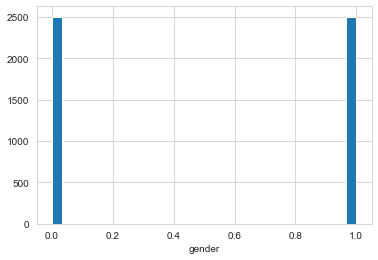

In [ ]:
sns.set_style('whitegrid')
data['gender'].hist(bins=30)
plt.xlabel('gender')

In [ ]:
sns.set_style('whitegrid')
data['age'].hist(bins=30)
plt.xlabel('age')

NameError: name 'sns' is not defined

In [ ]:
sns.set_style('whitegrid')
data['consumption level'].hist(bins=30)
plt.xlabel('consumption level')

NameError: name 'sns' is not defined

In [ ]:
sns.set_style('whitegrid')
data['shopping level'].hist(bins=30)
plt.xlabel('shopping level')

NameError: name 'sns' is not defined

Text(0.5, 0, 'occupation level')

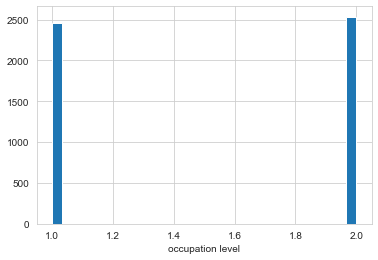

In [ ]:
sns.set_style('whitegrid')
data[' occupation level'].hist(bins=30)
plt.xlabel('occupation level')

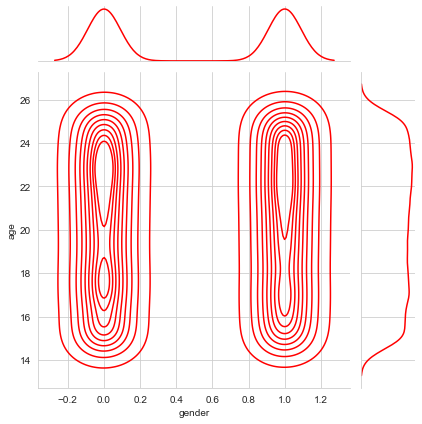

In [ ]:
sns.jointplot(x = 'gender', y = 'age', data = data, color = 'red', kind = 'kde')

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gender', ylabel='Density'>

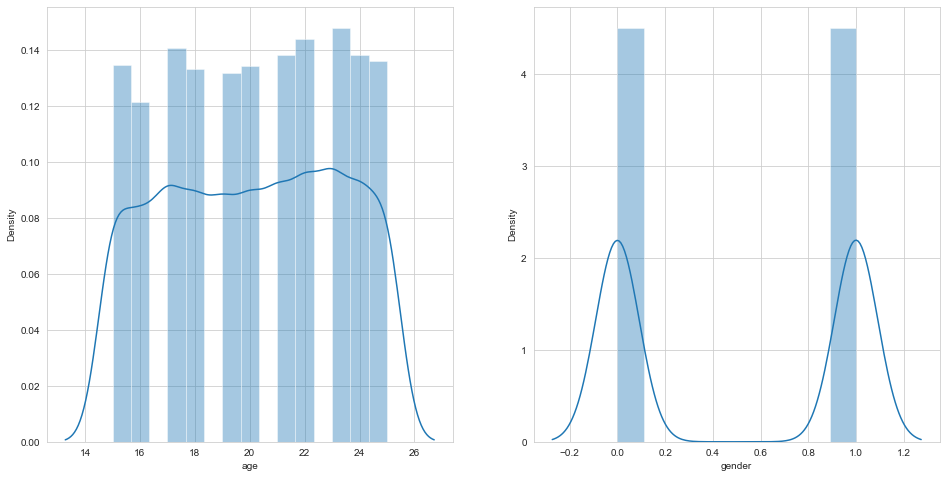

In [ ]:
import seaborn as sb
fig, ax = plt.subplots(1,2,figsize=(16,8)) 
sb.distplot(data['age'],ax=ax[0]) 
sb.distplot(data['gender'],ax=ax[1])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

<AxesSubplot:xlabel=' occupation level', ylabel='Density'>

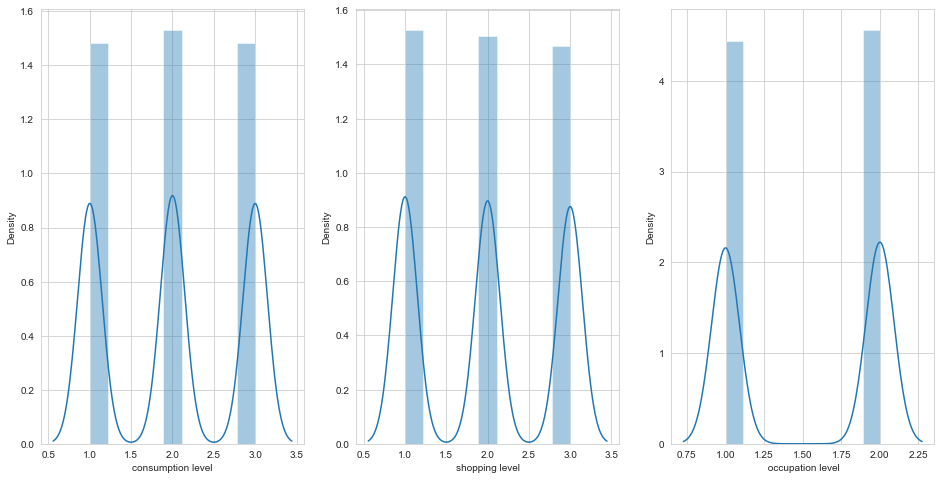

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(16,8)) 
sb.distplot(data['consumption level'],ax=ax[0]) 
sb.distplot(data['shopping level'],ax=ax[1])
sb.distplot(data[' occupation level'],ax=ax[2])


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

<AxesSubplot:xlabel=' occupation level', ylabel='Density'>

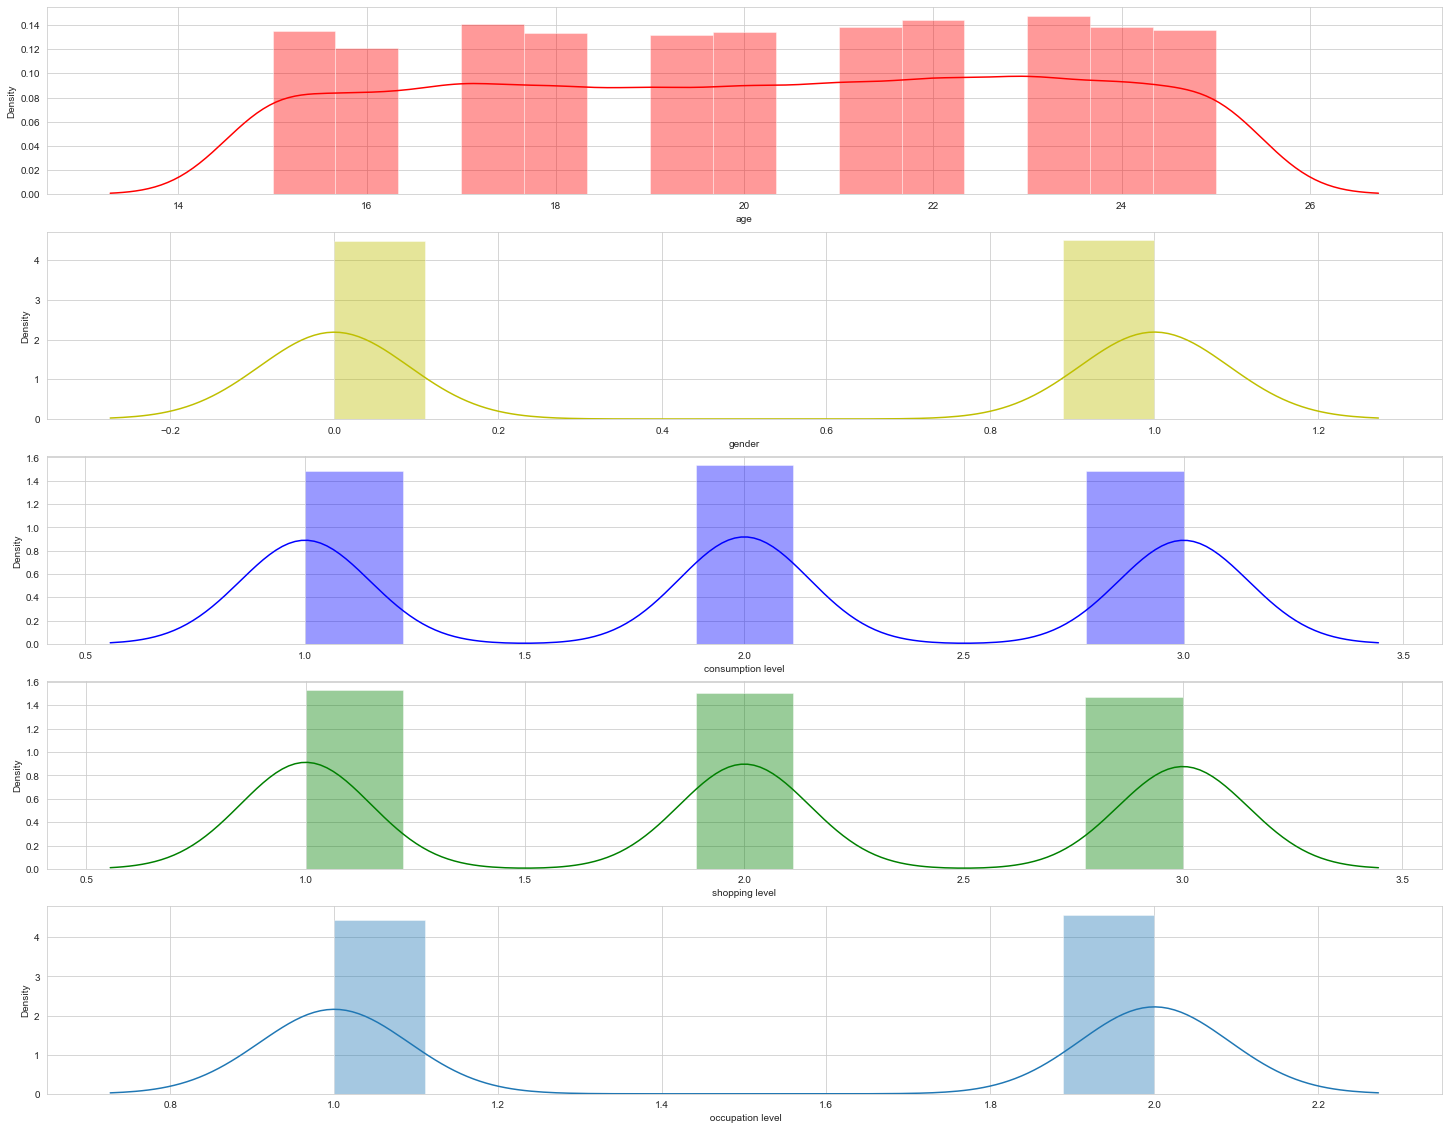

In [ ]:
fig, ax = plt.subplots(5,1,figsize=(25,20)) 
sb.distplot(data['age'],ax=ax[0],color='r') 
sb.distplot(data['gender'],ax=ax[1],color='y')
sb.distplot(data['consumption level'],ax=ax[2],color='b') 
sb.distplot(data['shopping level'],ax=ax[3],color='g') 
sb.distplot(data[' occupation level'],ax=ax[4]) 

In [ ]:
data

,userid,gender,age,consumption level,shopping level,occupation level,ad1,ad2,ad3,ad4,ad5,CTR VALUE
0,234,0,19,2,3,1,1,1,0,1,1,4
1,235,0,22,3,2,2,0,0,0,0,0,0
2,236,0,19,2,2,1,0,1,0,0,0,1
3,237,0,20,1,1,2,0,0,0,1,0,1
4,238,0,22,1,3,2,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,5228,1,22,3,3,2,0,1,0,1,1,3
4995,5229,0,16,2,3,1,0,0,0,1,1,2
4996,5230,0,19,2,3,2,1,1,1,1,0,4
4997,5231,1,19,1,3,2,1,0,0,1,1,3


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

<AxesSubplot:xlabel='ad5', ylabel='Density'>

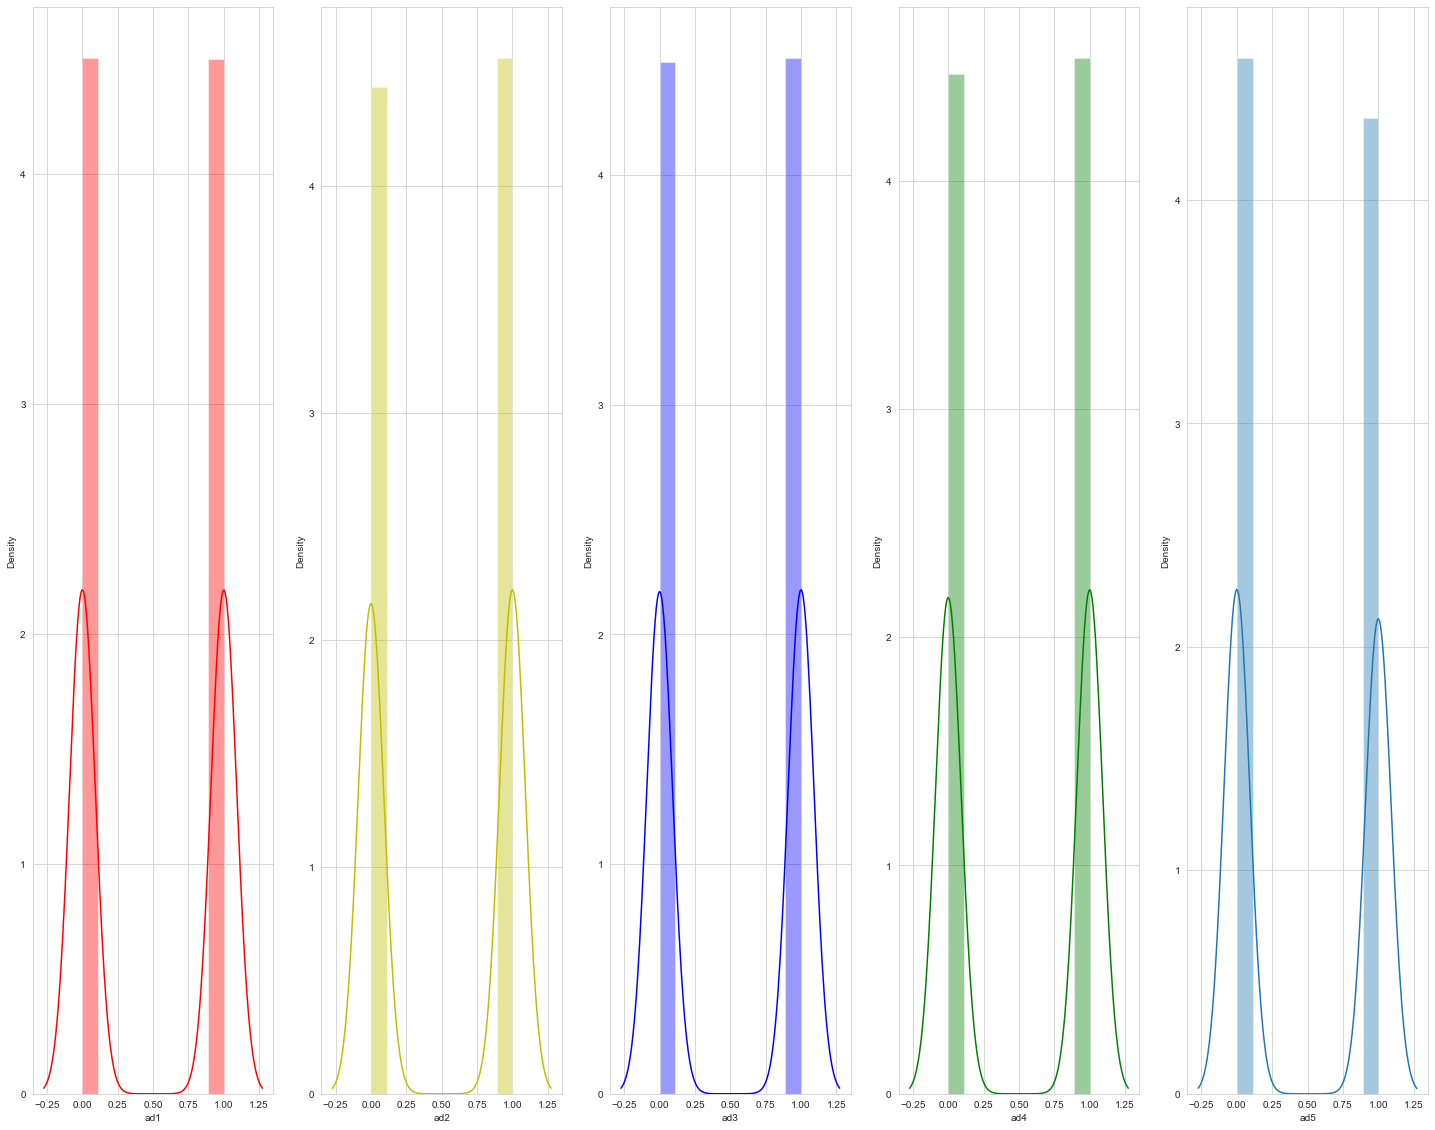

In [ ]:
fig, ax = plt.subplots(1,5,figsize=(25,20)) 
sb.distplot(data['ad1'],ax=ax[0],color='r') 
sb.distplot(data['ad2'],ax=ax[1],color='y')
sb.distplot(data['ad3'],ax=ax[2],color='b') 
sb.distplot(data['ad4'],ax=ax[3],color='g') 
sb.distplot(data['ad5'],ax=ax[4]) 

Text(0.5, 0, 'CTR VALUE')

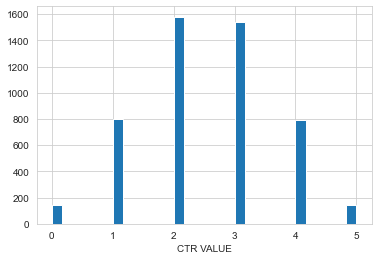

In [ ]:
sns.set_style('whitegrid')
data['CTR VALUE'].hist(bins=30)
plt.xlabel('CTR VALUE')

In [ ]:
data

,userid,gender,age,consumption level,shopping level,occupation level,ad1,ad2,ad3,ad4,ad5,CTR VALUE
0,234,0,19,2,3,1,1,1,0,1,1,4
1,235,0,22,3,2,2,0,0,0,0,0,0
2,236,0,19,2,2,1,0,1,0,0,0,1
3,237,0,20,1,1,2,0,0,0,1,0,1
4,238,0,22,1,3,2,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,5228,1,22,3,3,2,0,1,0,1,1,3
4995,5229,0,16,2,3,1,0,0,0,1,1,2
4996,5230,0,19,2,3,2,1,1,1,1,0,4
4997,5231,1,19,1,3,2,1,0,0,1,1,3


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data.columns

Index(['userid', 'gender', 'age', 'consumption level', 'shopping level',
       ' occupation level', 'ad1', 'ad2', 'ad3', 'ad4', 'ad5', 'CTR VALUE'],
      dtype='object')

In [ ]:
X = data[['gender', 'age', 'consumption level', 'shopping level', ' occupation level', 'ad1', 'ad3', 'ad4', 'ad5','ad2']]
y = data['CTR VALUE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logreg.predict(X_test)

In [ ]:
predictions

array([3, 3, 3, ..., 1, 2, 4], dtype=int64)

In [ ]:
y_test

2192    4
911     3
3729    3
4808    2
2937    2
       ..
2229    2
4876    2
3702    1
1763    2
3398    4
Name: CTR VALUE, Length: 1650, dtype: int64

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.88      0.96      0.92       267
           2       0.97      0.98      0.98       516
           3       0.89      0.95      0.92       501
           4       0.74      0.83      0.78       275
           5       0.00      0.00      0.00        57

    accuracy                           0.89      1650
   macro avg       0.58      0.62      0.60      1650
weighted avg       0.84      0.89      0.86      1650



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cv1=0.84

Text(0.5, 0, 'CTR VALUE')

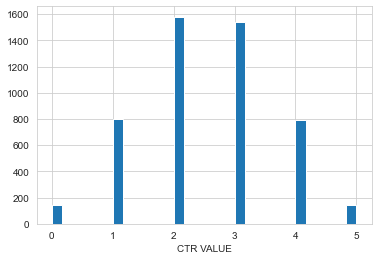

In [ ]:
sns.set_style('whitegrid')
data['CTR VALUE'].hist(bins=30)
plt.xlabel('CTR VALUE')

In [ ]:
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import linear_model, preprocessing

In [ ]:
predict = "CTR VALUE"

In [ ]:
le = preprocessing.LabelEncoder()
userid = le.fit_transform(list(data["userid"]))
gender = le.fit_transform(list(data["gender"]))
age = le.fit_transform(list(data["age"]))
consumptionlevel = le.fit_transform(list(data["consumption level"]))
shoppinglevel = le.fit_transform(list(data["shopping level"]))
occupationlevel = le.fit_transform(list(data[" occupation level"]))
ad1 = le.fit_transform(list(data["ad1"]))
ad2 = le.fit_transform(list(data["ad2"]))
ad3 = le.fit_transform(list(data["ad3"]))
ad4 = le.fit_transform(list(data["ad4"]))
ad5 = le.fit_transform(list(data["ad5"]))
CTRVALUE = le.fit_transform(list(data["CTR VALUE"]))

In [ ]:
x = list(zip(gender,age,consumptionlevel,shoppinglevel,occupationlevel,ad1,ad2,ad3,ad4,ad5))
y = list(CTRVALUE)

In [ ]:
import pandas as pd
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import linear_model, preprocessing
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)

In [ ]:
print(accuracy)

0.588


In [ ]:
cv2=0.588

In [ ]:
y_axis=np.array([cv1,cv2])
x_axis=np.array(["Logistic regression","KNN"])

Text(0.5, 1.0, 'Accuracy of Classification Algorithms')

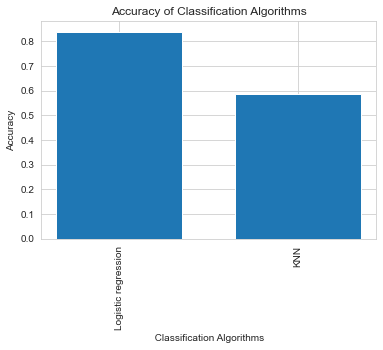

In [ ]:
from matplotlib import pyplot as plt
plt.bar(x_axis,y_axis,width=.7);
plt.xticks(rotation = 90)

plt.xlabel(" Classification Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of Classification Algorithms")